# SimplyP v.0.2 (alpha)

This notebook demonstrates basic usage of the [SimplyP model](https://github.com/LeahJB/SimplyP). Version 0.1 of the model is applied in

> Jackson-Blake LA, Sample JE, Wade AJ, Helliwell RC, Skeffington RA. 2017. *Are our dynamic water quality models too complex? A comparison of a new parsimonious phosphorus model, SimplyP, and INCA-P*. Water Resources Research, **53**, 5382–5399. [doi:10.1002/2016WR020132](http://onlinelibrary.wiley.com/doi/10.1002/2016WR020132/abstract;jsessionid=7E1F1066482B9FFDBC29BA6B5A80042C.f04t01)

and a full description is provided in the [Supplementary Information](https://agupubs.onlinelibrary.wiley.com/action/downloadSupplement?doi=10.1002%2F2016WR020132&file=wrcr22702-sup-0001-2016WR020132-s01.pdf). Changes to the model which have occurred since then are documented in the development log in the SimplyP GitHub repository. All code is [available online](https://github.com/LeahJB/SimplyP) under an [MIT licence](https://github.com/LeahJB/SimplyP/blob/Hydrology_Model/LICENSE).

## Tarland Burn example

This example uses data from the Tarland Burn in Aberdeenshire. Input data files, in the format required by SimplyP, can be found [here](https://github.com/LeahJB/SimplyP/tree/Hydrology_Model/Example_Data).

### Instructions for running the model

1. Download [the repository](https://github.com/LeahJB/SimplyP) and open the model parameter Excel file, which is located in *Example_Data/Parameters_vx-xx_Tarland.xlsx* (replace the x-xx with the version number of the model that you are using, e.g. v0-2A). The excel file contains a 'Readme' sheet with further instructions but, as a minimum, you will need to **modify the file and folder paths** for the input data in the 'Setup' sheet to match those on your system. <br><br>

2. Provide the full file path to the Excel parameter file in the notebook cell below and select the figure display option (further details are provided below, in the 'User input' cell) <br><br>

3. Select 'Cell' (from the toolbar above) followed by 'Run all'. Alternatively, you can run one cell at a time by clicking within a cell and then selecting 'Cell'>Run cells, or by pressing Alt-Enter <br><br>

4. Wait, and then check that the model has run. Depending on your system, it may take around 4 seconds to run for a year for one sub-catchment/reach. The model will output results (stats and graphs) in this notebook once it has finished, and it will save any files of model output that you have requested be saved (using the 'Setup' parameters sheet in the parameters Excel file). You can keep a tab on whether or not the model is still running by looking at CPU usage via the task manager <br><br>

5. Check that there are no pink warning messages below the '#Run model' cell (heading 3). If running the model produces warnings, it is likely that one of your parameter values is too small or large - check your values against the recommended ranges. Alternatively, there may be a problem with your input data <br><br>

6. Model output may be saved to files (csvs and images) if the setup parameter options for saving to file are selected. Regardless, results are output in this notebook below - scroll down to see graphs and stats.

If the model does not run, scroll down this notebook to look for error messages. If there is one, check whether it relates to your input data or parameters, which may be in the wrong format or contain some other inconsistencies which are checked for by the model (e.g. land use fractions must sum to 1, the start and end dates in the Setup parameters sheet may be in the wrong format, etc.). Please report other error messages by [submitting a pull request via GitHub](https://github.com/LeahJB/SimplyP/pulls) or emailing Leah Jackson-Blake (<ljb@niva.no>).

### 1. User input

* **Provide the full file path to the excel parameter file in the cell below**<br>
The file path should be encased within apostrophes, with the letter r before the first apostrophe (to indicate a 'raw' string)
e.g. `params_fpath = r'D:\ModelInputs\myParamFile.xlsx'`<br><br>

* **Set plotting display options**<br>
If you primarily want to view results in this notebook, rather than save them to file, then set the fig_display_type option in the cell below to 'notebook'. Otherwise, set to 'paper'. This controls the plot figure size and font size

In [1]:
# Path to the Excel file containing parameters for setup and all the model parameters
params_fpath = (r'Parameters_v0-2A_Tarland.xlsx')

# Plotting options: either 'paper' or 'notebook'
fig_display_type = 'notebook'

# Set within-notebook plots to be interactive (zoomable and pannable)?
# If yes, comment out the line below (add # to the start of the line) and uncomment the bottom line (delete the #)
%matplotlib inline
# %matplotlib notebook

### 2. Read input data

The function `sp.read_input_data()` reads the Excel setup file and the datasets specified within it (i.e. input meteorology data and any observed data). If necessary, any derived inputs are calculated (e.g. snow accumulation and melt, PET).

In [2]:
# Import the simplyP module
import simplyP as sp

# Read in model inputs, parameters, and any observations. If necessary calculate derived inputs
p_SU, dynamic_options, p, p_LU, p_SC, p_struc, met_df, obs_dict = sp.inputs.read_input_data(params_fpath)

Parameter values successfully read in
Input meteorological data read in
Snow accumulation and melt module run to estimate snowmelt inputs to the soil


### 3. Run the model

The input data is passed to the model function `sp.run_simply_p()`. After running, check there are no pink warning messages below the code cell. Warning boxes likely suggest the ODE solver did not run propery, most likely due to issues with the input parameters.

Model results will be saved as csvs if you turned on this setting in the parameter 'Setup' sheet and provided a valid filepath for files to be saved to. Plots of model results are saved by running the plotting cells below.

**Note:** If calibrating (`run_mode=='cal'` in the setup parameter sheet), the $Kf$ parameter (the soil sorption coefficient) will be estimated and printed at the end of the run. This can then be used for validation/scenarios, by setting it as a parameter in the input parameter file.

In [3]:
%%time
# Run model
df_TC_dict, df_R_dict, Kf, ode_output_dict = sp.run_simply_p(met_df, p_struc, p_SU, p_LU,
                                                             p_SC, p, dynamic_options)

Starting model run for sub-catchment: 1
No reaches directly upstream of this reach
Finished!

Starting model run for sub-catchment: 2
Reaches directly upstream of this reach: [1.0]
Finished!

Kf (the soil P sorption coefficient; mm/kg): 0.00011315280464216634

Results saved to csv

Wall time: 10.8 s


### 4. Explore model results

The following code cells summarise the model output graphically and, if there are observations, calculates goodness-of-fit statistics. If you opted to save graphs in the setup sheet in the parameter file, then these will be saved to file.

#### 4.1. Results from snow module

This plot is only really relevant if it was called during the model run (i.e. `inc_snowmelt=='y'` in the setup sheet in the Excel parameter file). Otherwise, it will just plot the input meteorology data (and PET, if this was calculated by the model rather than being read in).

Plots will be saved to file if you turn this option on and provide a filepath in the parameter file ('Setup' sheet)

In [ ]:
# Plot snowfall/melt
sp.plot_snow(met_df, p_SU, fig_display_type)

#### 4.2. Results from terrestrial processing

Results from the terrestrial compartment. Acronyms in chart axes are as follows: ET: evapotranspiration, Q: water flow, SW: soil water, Agri: agricultural land, SN: semi-natural land, GW: groundwater, vol: water volume.

If soil P dynamics are turned on ('Dynamic_EPC0' = 'y' in Setup parameters), then soil labile P content, soil water EPC0 (the equilibrium TDP concentration at which there is no net sorption or desorption) and soil water TDP concentration are also shown. Otherwise these are constant and are not plotted.

Plots will be saved to file if you turn this option on and provide a filepath in the parameter file ('Setup' sheet)

In [ ]:
# Plot terrestrial
sp.plot_terrestrial(p_SU, p_SC, p, df_TC_dict, met_df, fig_display_type)

#### 4.3. Instream results

Choose how many reaches you want to plot results for in the setup sheet of the parameter file. If you provide a file path to observations in the parameter setup sheet, then observations will also be plotted. Some plotting options are available in the parameter setup sheet (e.g. which variables to plot, logged y-axis, colour and symbol options).

Plots will be saved to file if you turn this option on and provide a filepath in the parameter file ('Setup' sheet)

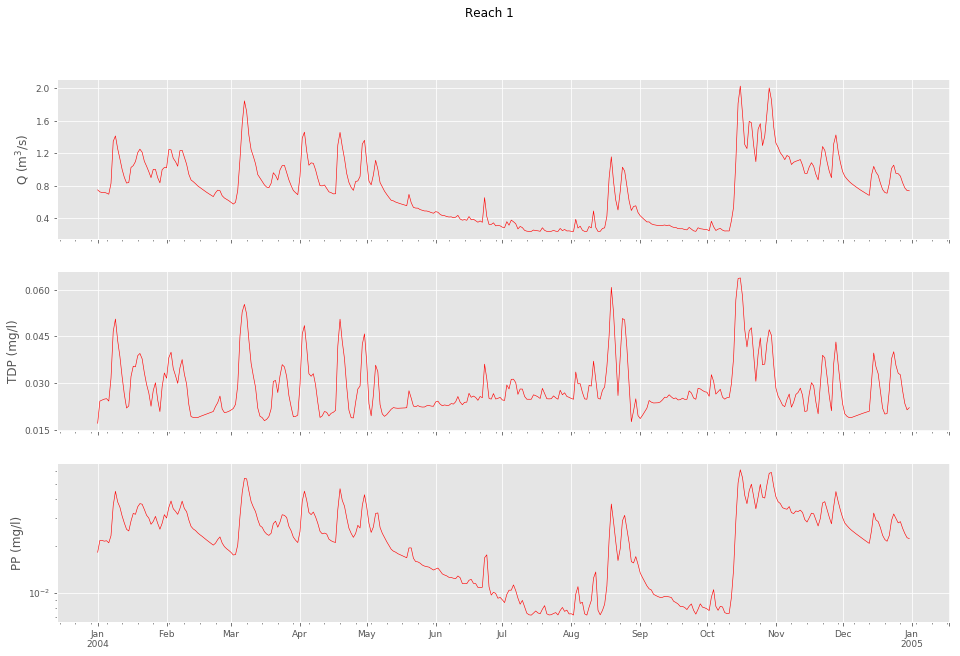

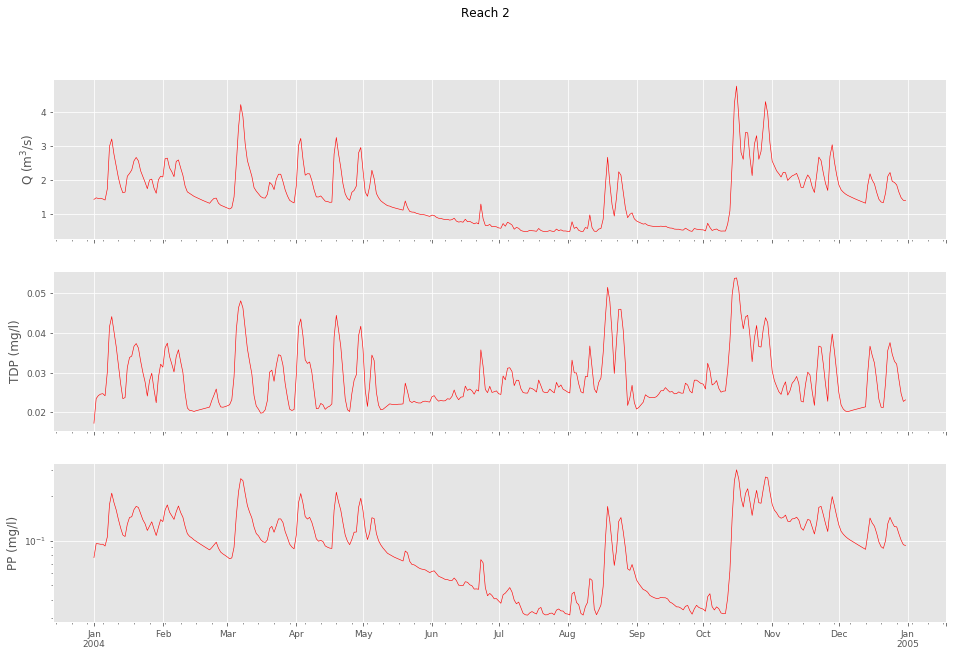

In [4]:
# Plot in-stream
# N.B. if you selected a log scale, you may get a warning if any of the simulated values are close to 0.
sp.plot_in_stream(p_SU, obs_dict, df_R_dict, fig_display_type)

#### 4.4. Calculate goodness-of-fit statistics

Statistics are only calculated for reaches and parameters which have more than 10 observations.

Statistics in the table include: Nobs (number of observations), NSE (Nash-Sutcliffe Efficiency), log NSE (NSE on logged values), Spearman's r (Spearman's correlation coefficient), r$^2$ (Pearman's correlation coefficient squared), bias (percent; the sum of the difference between simulated and observed data divided by the sum of the observed data), nRMSE (normalised root mean square deviation).

The table will be saved to file if you turn this option on and provide a filepath in the parameter file ('Setup' sheet)

In [ ]:
# GoF summary
gof_stats = sp.goodness_of_fit_stats(p_SU, df_R_dict, obs_dict)
gof_stats

### 5. Optional: Calculate summed inputs to a downstream waterbody (e.g. a lake or an estuary)

If you would like to aggregate inputs from a number of sub-catchments into a single time series (e.g. to look at total inputs to a receiving waterbody), then that can be done here. First, make sure you have correctly specified your reach structure in the input parameter file (Sheet 'Reach_structure'), and that you have marked which reaches input directly to the waterbody.

Results will be plotted below. If you have selected for csvs of model results to be saved, then results will also be saved to file (to the output filepath specified in the Setup parameter sheet).


In [ ]:
# Sum discharges and masses from reaches directly upstream, and calculate
# in-stream concentrations
df_summed = sp.sum_to_waterbody(p_struc, p_SU['n_SC'], df_R_dict, p['f_TDP'])

# Plot results and save to csv if parameter 'save_output_csvs' set to 'y' in
# parameter 'Setup' sheet
if df_summed is not None: # Only plot if have done the sum (at least 2 reaches included in the sum)
    sp.plot_instream_summed(p_SU, df_summed, fig_display_type)